
#  Car Resale Price Analysis & Visualization System

## Problem Statement
 You are a data analyst working for a car dealership. You have received a CSV file containing sales data.
 Your goal is to understand the sales pattern, customer behavior, and make visual insights using Python basics,
 Object-Oriented Programming (OOP), NumPy, Pandas, Matplotlib, and Seaborn.

Your job includes:
- Data cleaning and preprocessing
- Basic analysis
- OOP implementation
- Visualization
- Extracting insights


In [14]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('daTA.csv')
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB




*  **Define a CarSale Class (OOP Concept)**




In [16]:

class CarSale:
    def __init__(self, brand, model, year, price):
        self.brand = brand
        self.model = model
        self.year = year
        self.price = price

    def car_age(self, current_year=2025):
        return current_year - self.year

    def is_luxury(self):
        return self.price > 2000000

In [17]:
example = CarSale("Toyota", "Camry", 2018, 1600000)
print(f"Example car is {example.car_age()} years old. Luxury: {example.is_luxury()}")

Example car is 7 years old. Luxury: False




*   **Null Values**




In [18]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [19]:
df = df.dropna()



*   **Feature Engineering with NumPy**




In [20]:
# Add new column: Age of car
current_year = 2025
df['Car_Age'] = current_year - df['Year']

In [21]:
df.rename(columns={
    'Car_Name': 'Brand',
    'Present_Price': 'Price'
}, inplace=True)

In [22]:
# Classify price segments using NumPy
price_array = df['Price'].values # Corrected column name to 'price'
price_segment = np.where(price_array > 2000000, 'Luxury', 'Standard')
df['Segment'] = price_segment

In [23]:
df

,Brand,Year,Selling_Price,Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Segment
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11,Standard
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12,Standard
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8,Standard
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14,Standard
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11,Standard
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,9,Standard
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,10,Standard
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,16,Standard
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,8,Standard




*   **Descriptive Statistics using Pandas**




In [24]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
              Year  Selling_Price       Price     Kms_Driven       Owner  \
count   301.000000     301.000000  301.000000     301.000000  301.000000   
mean   2013.627907       4.661296    7.628472   36947.205980    0.043189   
std       2.891554       5.082812    8.644115   38886.883882    0.247915   
min    2003.000000       0.100000    0.320000     500.000000    0.000000   
25%    2012.000000       0.900000    1.200000   15000.000000    0.000000   
50%    2014.000000       3.600000    6.400000   32000.000000    0.000000   
75%    2016.000000       6.000000    9.900000   48767.000000    0.000000   
max    2018.000000      35.000000   92.600000  500000.000000    3.000000   

          Car_Age  
count  301.000000  
mean    11.372093  
std      2.891554  
min      7.000000  
25%      9.000000  
50%     11.000000  
75%     13.000000  
max     22.000000  


In [25]:
df.rename(columns={
    'Car_Name': 'Brand',
    'Present_Price': 'Price'
}, inplace=True)

In [26]:
# Brand-wise average price
print("\nAverage price per brand:")
print(df.groupby('Brand')['Price'].mean())


Average price per brand:
Brand
800                  2.280000
Activa 3g            0.530000
Activa 4g            0.510000
Bajaj  ct 100        0.320000
Bajaj Avenger 150    0.800000
                       ...   
sx4                  8.066667
verna                9.400000
vitara brezza        9.830000
wagon r              4.450000
xcent                7.130000
Name: Price, Length: 98, dtype: float64




*   **Data Visualization**




In [27]:
sns.set_style("whitegrid")

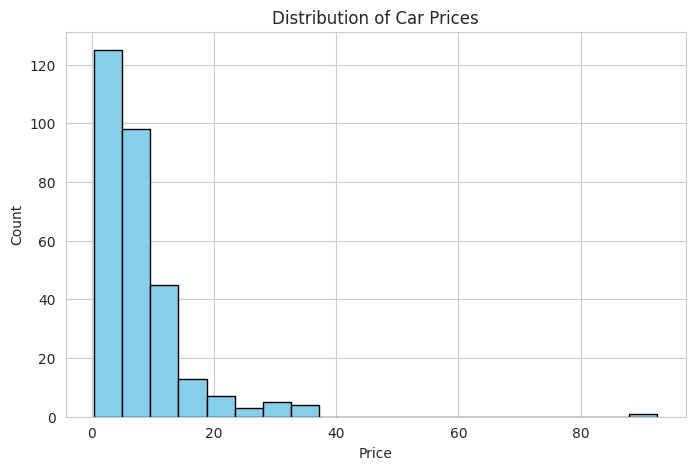

In [28]:
# Histogram of car prices
plt.figure(figsize=(8, 5))
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

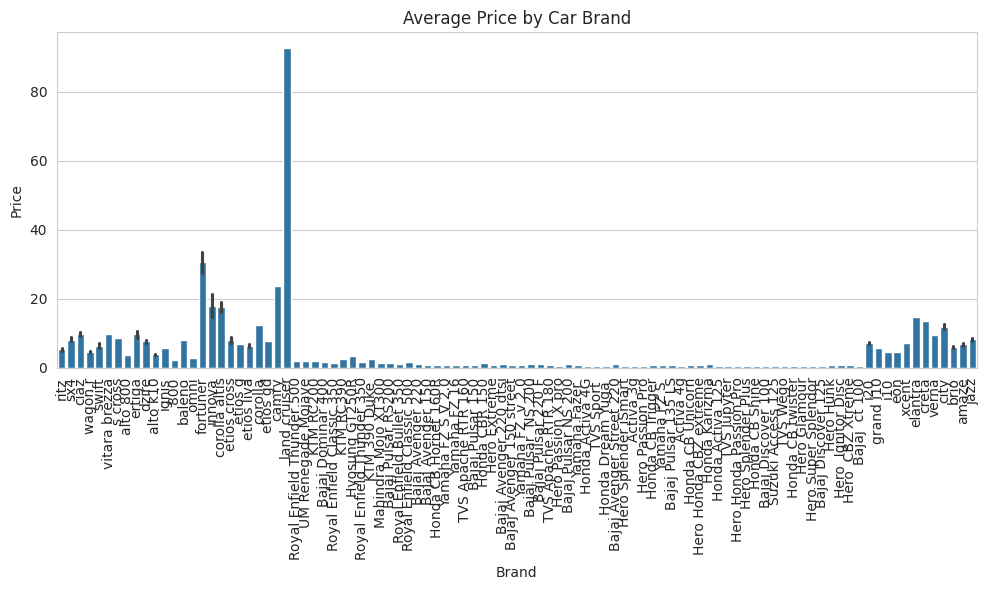

In [33]:
# Bar plot: Average price by Brand
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Brand', y='Price', estimator=np.mean)
plt.title('Average Price by Car Brand')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

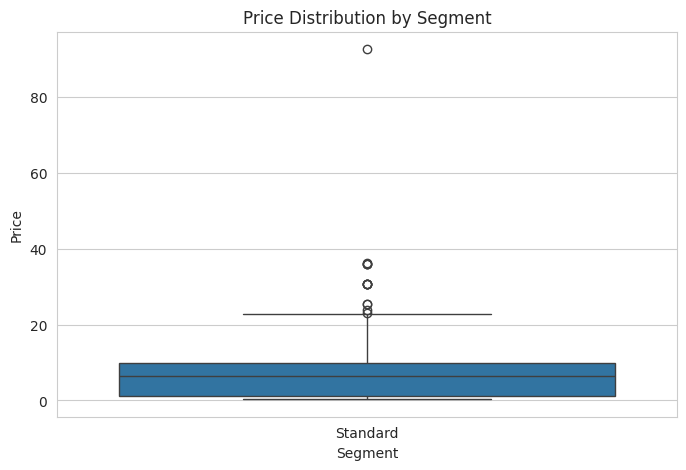

In [30]:
# Box plot: Price vs Segment
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Segment', y='Price')
plt.title('Price Distribution by Segment')
plt.show()

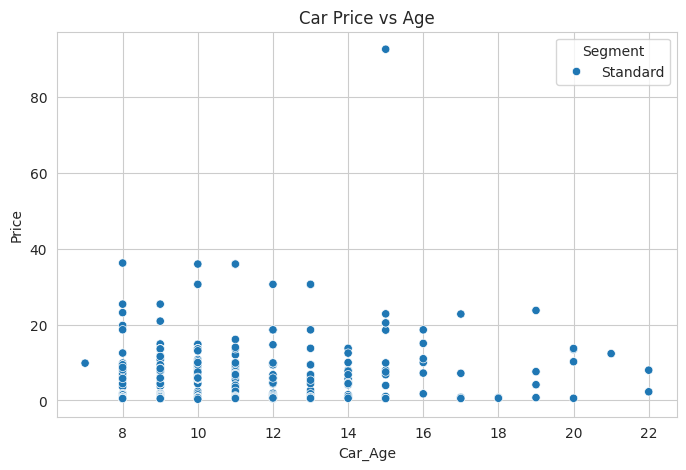

In [31]:
# Scatter plot: Price vs Car Age
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Car_Age', y='Price', hue='Segment')
plt.title('Car Price vs Age')
plt.show()



*   **Summary**




In [32]:
''' In this project, we:
  - Used Python basics and OOP to model car sales data
  - Cleaned and explored data using Pandas
  - Engineered new features using NumPy
  - Created visualizations with Matplotlib and Seaborn
  This project gives foundational exposure to all major tools in data analytics with Python.

  Note: Ensure the column names in 'daTA.csv' match exactly, like 'Brand', 'Model', 'Year', 'Price'
  Modify as needed to fit your specific dataset structure.'''

" In this project, we:\n  - Used Python basics and OOP to model car sales data\n  - Cleaned and explored data using Pandas\n  - Engineered new features using NumPy\n  - Created visualizations with Matplotlib and Seaborn\n  This project gives foundational exposure to all major tools in data analytics with Python.\n\n  Note: Ensure the column names in 'daTA.csv' match exactly, like 'Brand', 'Model', 'Year', 'Price'\n  Modify as needed to fit your specific dataset structure."